In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
news = pd.read_csv('/Users/PawanKumar/Downloads/OnlineNewsPopularity.csv')

In [3]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Get the statistics of original target attribute
popularity_raw = news[news.keys()[-1]]
popularity_raw.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [5]:
news.keys()[-1]

'shares'

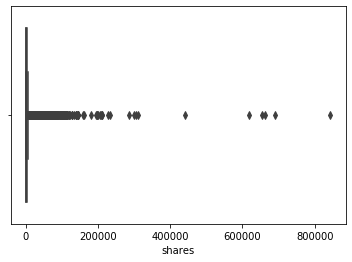

In [6]:
sns.boxplot(news[news.keys()[-1]])

In [7]:
# Get the features from dataset
features_raw = news.drop([news.keys()[0],news.keys()[1],news.keys()[-1]], axis=1)
features_raw.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [8]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[29:36]
unpop=news[news['shares']<1400]
pop=news[news['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

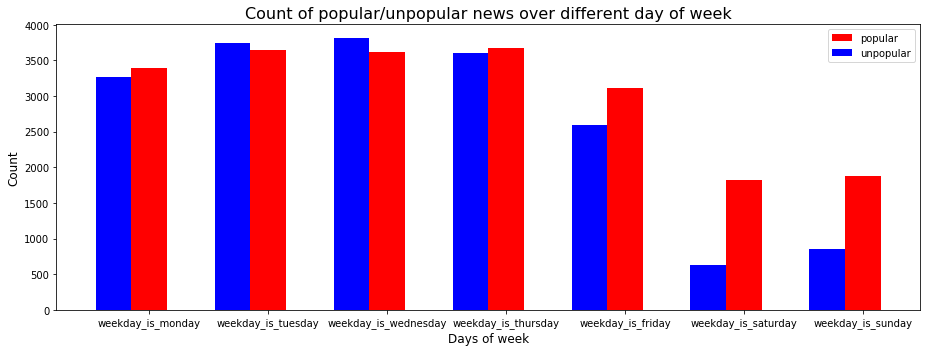

In [9]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
# plt.savefig("days.pdf")
# plt.show()

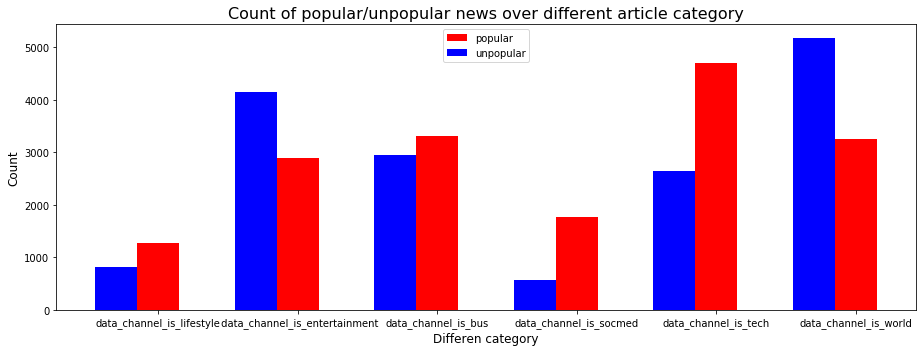

In [10]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different article category", fontsize = 16)
plt.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_chan)), columns_chan)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("Differen category", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()

In [11]:

# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',\
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',\
       'average_token_length', 'num_keywords','n_tokens_title', 'n_tokens_content',\
             'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']
features_raw[numerical] = scaler.fit_transform(news[numerical])
features_raw.head()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [13]:
# PCA Decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=8380)
reduced_features = pca.fit_transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2'])
reduced_features_pop = reduced_features[news['shares']>=1400]
reduced_features_unpop = reduced_features[news['shares']<1400]

In [14]:
reduced_features.head()

,Dimension 1,Dimension 2
0,791367.700509,84433.013317
1,791367.700509,84433.013318
2,791367.700509,84433.013317
3,791367.700509,84433.013316
4,791367.700509,84433.013315


In [15]:
pca.explained_variance_ratio_.sum()

0.9627510340163342

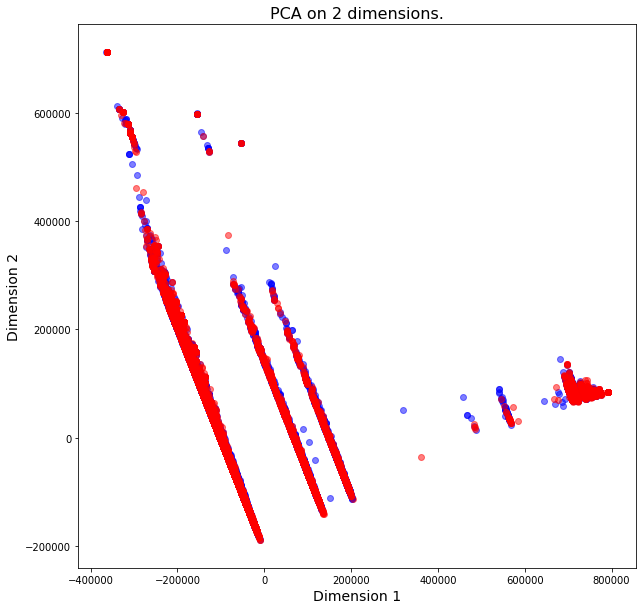

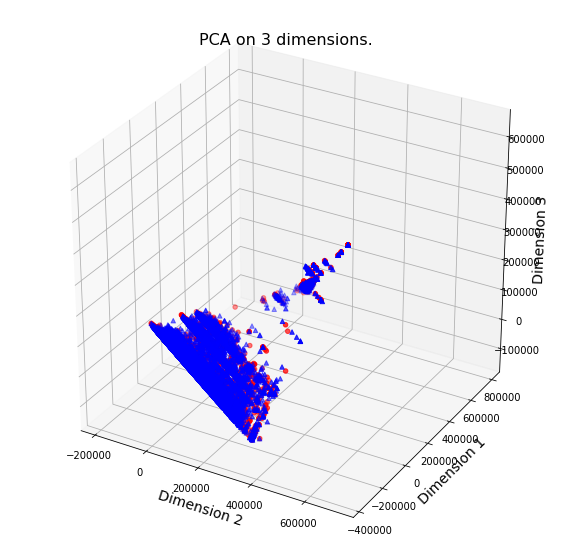

In [297]:
import matplotlib.pyplot as pl
fig, ax = pl.subplots(figsize = (10,10))

# Scatterplot of the reduced data    
ax.scatter(x=reduced_features_pop.loc[:, 'Dimension 1'], y=reduced_features_pop.loc[:, 'Dimension 2'],\
           c='b',alpha=0.5)
ax.scatter(x=reduced_features_unpop.loc[:, 'Dimension 1'], y=reduced_features_unpop.loc[:, 'Dimension 2'],\
           c='r', alpha=0.5)
ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PCA on 2 dimensions.", fontsize=16);
pl.savefig("pca2.jpg")

from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_features_pop = reduced_features[news['shares']>=1400]
reduced_features_unpop = reduced_features[news['shares']<1400]
# 3D scatterplot of the reduced data 
fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( reduced_features_pop.loc[:, 'Dimension 2'],reduced_features_pop.loc[:, 'Dimension 1'],\
           reduced_features_pop.loc[:, 'Dimension 3'], c='b',marker='^')
ax.scatter(reduced_features_unpop.loc[:, 'Dimension 2'],reduced_features_unpop.loc[:, 'Dimension 1'],\
           reduced_features_unpop.loc[:, 'Dimension 3'], c='r')
ax.set_xlabel("Dimension 2", fontsize=14)
ax.set_ylabel("Dimension 1", fontsize=14)
ax.set_zlabel("Dimension 3", fontsize=14)
ax.set_title("PCA on 3 dimensions.", fontsize=16);
pl.savefig("pca3.jpg")

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw>=1400))

In [20]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(features_raw, popular_label)
selector.ranking_

estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features_raw, popular_label)
selector_LR.ranking_

estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features_raw, popular_label)
selector_RF.ranking_

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\

array([ 1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  9,  1,  8,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  3,  5,  6,
        1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [17]:
# Split data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

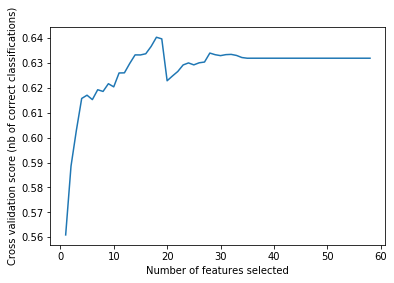

18
['n_non_stop_unique_tokens' 'num_self_hrefs' 'num_imgs' 'num_videos'
 ' data_channel_is_entertainment' 'data_channel_is_socmed' 'kw_min_max'
 'kw_max_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'self_reference_min_shares' 'self_reference_max_shares'
 'self_reference_avg_sharess' 'weekday_is_saturday' 'LDA_02'
 'global_subjectivity' 'global_sentiment_polarity']


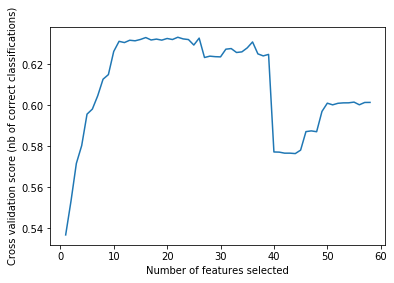

22
['average_token_length' 'num_keywords' ' data_channel_is_entertainment'
 'data_channel_is_bus' 'data_channel_is_socmed' 'data_channel_is_tech'
 'data_channel_is_world' 'weekday_is_monday' 'weekday_is_tuesday'
 'weekday_is_wednesday' 'weekday_is_thursday' 'weekday_is_saturday'
 'is_weekend' 'LDA_00' 'LDA_01' 'LDA_02' 'LDA_04' 'rate_negative_words'
 'avg_negative_polarity' 'min_negative_polarity'
 'title_sentiment_polarity' 'abs_title_subjectivity']


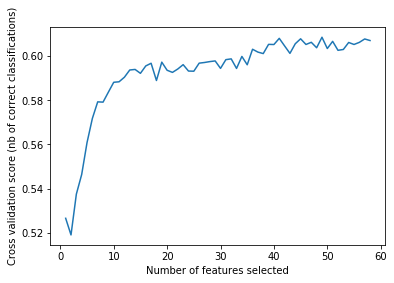

9
['n_non_stop_words' 'data_channel_is_lifestyle' 'data_channel_is_bus'
 'weekday_is_monday' 'weekday_is_tuesday' 'weekday_is_wednesday'
 'weekday_is_thursday' 'weekday_is_friday' 'weekday_is_sunday']


In [26]:

import matplotlib.pyplot as pl
# Plot the cv score vs number of features
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
# pl.savefig('RFE_ADA.pdf')
pl.show()

print (features_raw.columns.values[selector.ranking_==1].shape[0])
print (features_raw.columns.values[selector.ranking_==1])
features_ADA = features_raw[features_raw.columns.values[selector.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
# pl.savefig('RFE_LR.pdf')
pl.show()

print (features_raw.columns.values[selector_LR.ranking_==1].shape[0])
print (features_raw.columns.values[selector_LR.ranking_==1])
features_LR = features_raw[features_raw.columns.values[selector_LR.ranking_==1]]


pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
# pl.savefig('RFE_RF.pdf')
pl.show()

print (features_raw.columns.values[selector_RF.ranking_!=1].shape[0])
print (features_raw.columns.values[selector_RF.ranking_!=1])
features_RF = features_raw[features_raw.columns.values[selector_RF.ranking_==1]]

In [33]:
import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
 
    
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']))   
    # Return the results
    return results


In [38]:

# Split data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split


X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.1, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.1, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.1, random_state = 0)

print ("Training set has {} samples.".format(X_train_ADA.shape[0]))
print ("Testing set has {} samples.".format(X_test_ADA.shape[0]))

# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
# evaluate(results,'perf_unopt.pdf')

Training set has 35679 samples.
Testing set has 3965 samples.
AdaBoostClassifier trained on 356 samples.
AdaBoostClassifier with accuracy 0.5861286254728878, F1 0.6016023306627821 and AUC 0.585664758433613.
AdaBoostClassifier trained on 3567 samples.
AdaBoostClassifier with accuracy 0.6519546027742749, F1 0.6790697674418604 and AUC 0.6493402387527594.
AdaBoostClassifier trained on 35679 samples.
AdaBoostClassifier with accuracy 0.6580075662042875, F1 0.6887052341597796 and AUC 0.6546909779741167.
LogisticRegression trained on 356 samples.
LogisticRegression with accuracy 0.5838587641866331, F1 0.6027924891670678 and AUC 0.5829404118048899.
LogisticRegression trained on 3567 samples.
LogisticRegression with accuracy 0.6300126103404792, F1 0.6687739896139083 and AUC 0.6256881653668199.


C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 35679 samples.
LogisticRegression with accuracy 0.6330390920554855, F1 0.6714834048317906 and AUC 0.6287224446878557.
RandomForestClassifier trained on 356 samples.
RandomForestClassifier with accuracy 0.580327868852459, F1 0.581067472306143 and AUC 0.5817333323810023.


C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 3567 samples.
RandomForestClassifier with accuracy 0.6136191677175283, F1 0.6125442589782498 and AUC 0.6153411325833386.
RandomForestClassifier trained on 35679 samples.
RandomForestClassifier with accuracy 0.6312736443883985, F1 0.6341341341341341 and AUC 0.6325027307238446.


In [35]:
from time import time

In [41]:
popular_label.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64